# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
df_cleaned = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
df_cleaned.loc[:, 'Number of Discharges'] = df_cleaned['Number of Discharges'].astype(int)
df_cleaned = df_cleaned.sort_values('Number of Discharges')

C:\Users\yoots\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


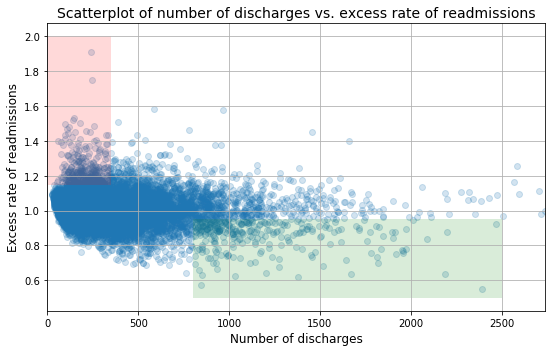

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in df_cleaned['Number of Discharges'][81:-3]]
y = list(df_cleaned['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Part A. Do you agree with the above analysis and recommendations? Why or Why not? ##

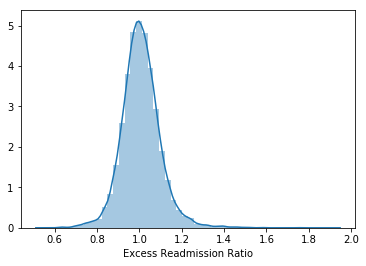

In [5]:
## Plot distribution on exccess readmission ratio:
sns.distplot(df_cleaned['Excess Readmission Ratio'].dropna())

The distribution of "Excess Readmission Ratio" seems normally distributed despite that fact there are some missing values.

#### S1. Overall, rate of readmission is trending down with increase in number of discharges ####

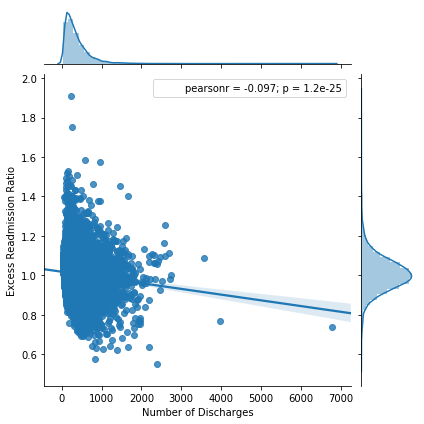

In [6]:
sns.jointplot(data=df_cleaned, x='Number of Discharges', y='Excess Readmission Ratio', kind='reg')

Based on above graph, pearson correlation = -0.097 indicates that there is a very weak negative correlation on number of discharges and excess readmission ratio. Thus, it is not significant to conclude that there is downward trend with increase in number of discharges!

#### S2. With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red) ####

#### S3. With higher number of discharges, thereis a greater incidence of lower rates of readmissions (area shaded green) ####

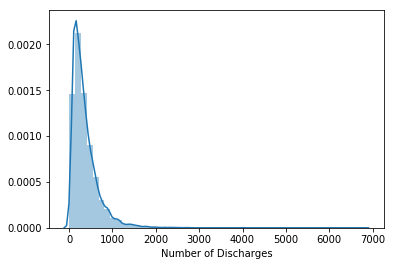

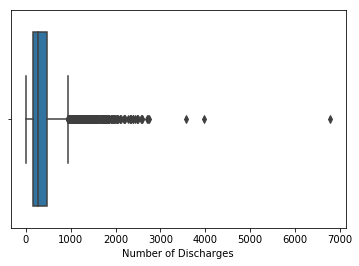

In [7]:
## Distribution and box plot on number of discharges ##
sns.distplot(df_cleaned['Number of Discharges'])
plt.show()

sns.boxplot(df_cleaned['Number of Discharges'])
plt.show()

In [8]:
df_stat = df_cleaned['Number of Discharges'].describe()
print(df_stat)

mean = df_stat['mean']
std = df_stat['std']

count    11578.000000
mean       362.909397
std        309.176945
min          0.000000
25%        157.000000
50%        280.000000
75%        472.750000
max       6793.000000
Name: Number of Discharges, dtype: float64


* Based on obtained mean and std of number of discharges, plot a trend that are within 95% confidence interval: +/- 2*std.dev from either side of mean: number of discharges.
* Lets create a dataframe which contains number of discharges within 95% confidence interval range.

In [9]:
df_cleaned_adj = df_cleaned[(df_cleaned['Number of Discharges'] >= mean - (2*std)) & (df_cleaned['Number of Discharges'] <= mean + (2*std))]

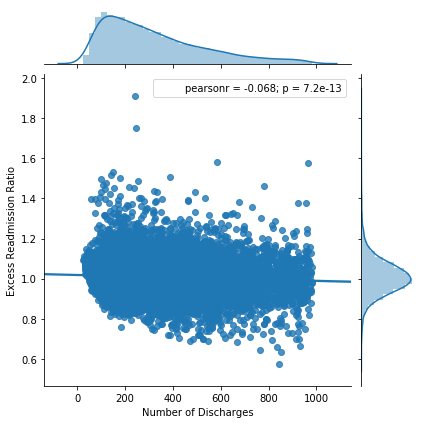

In [10]:
sns.jointplot(data=df_cleaned_adj, x='Number of Discharges', y='Excess Readmission Ratio', kind='reg')
plt.show()

First, the distribution on number of discharges is clearkly skewed to right (positive skew). The distribution is not normal!. Number of discharges had mean of 365 and huge standard deviation of 309. Second, observed trends reported from preliminary analysis report is misintepretation due to a few data points available from discharges greater than 1000. Finally, the 95% confidence interval of regression plot indicates that there is no significant correlation on number of discharges and excess readmission ratio with pearson correlation value of -0.068.

## Part B. Statistics ##
1. In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1.
2. In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.

In [11]:
# Lets create a dataframe where number of discharges are less than 100 or greater than 1000:
df_100 = df_cleaned[df_cleaned['Number of Discharges'] < 100]
mean_er_100 = np.mean(df_100['Excess Readmission Ratio'])
print('Mean Excess Readmission Rate is %.2f' % mean_er_100)
pct_er_100 = np.count_nonzero(df_100['Excess Readmission Ratio'] > 1)/np.count_nonzero(df_100['Excess Readmission Ratio'])
print('Have Excess Readmission Rate greater than %.2f' %  pct_er_100)

df_1000 = df_cleaned[df_cleaned['Number of Discharges'] > 1000]
mean_er_1000 = np.mean(df_1000['Excess Readmission Ratio'])
print('Mean Excess Readmission Rate is %.2f' % mean_er_1000)
pct_er_1000 = np.count_nonzero(df_1000['Excess Readmission Ratio'] > 1)/np.count_nonzero(df_1000['Excess Readmission Ratio'])
print('Have Excess Readmission Rate greater than %.2f' %  pct_er_1000)

Mean Excess Readmission Rate is 1.02
Have Excess Readmission Rate greater than 0.59
Mean Excess Readmission Rate is 0.98
Have Excess Readmission Rate greater than 0.44


Thus, it is confirmed that for hospitals with number of discharges < 100, mean excess readmission rate is 1.02. However, 59% of cases have excess admission rate greater than 1 not 63%. Conversely, for hospitals with number of discharges > 1000, mean excess admission rate and % of excess readmission greater than 1 hold true as preliminary analysis reported previously.

## Part C. Conclusions ##
1. There is a significant correlation between hospital capcity (# of discharges) and readmission rates.
2. Smaller hospitals maybe lacking necessary resources to ensure qaulity care and prevent complications that lead to readmissions.

Based on our validation of above analyses, we found that there is no significant correlation with number of discharges and readmission rates whatsoever. The proof was made with a reported pearson correlation value nearly zero (r = -0.098). 

Also it is not possible to make such an abrupt conclusion that smaller hospitals maybe lacking necessary resources to ensure quality care and prevent readmission. This is true in fact that mean excess readmission rate between two groups (i.e., group1: hospitals with number of discharges < 100 and group2: hospitals with number of discharges > 1000) is not much difference!

## Part D. Regulatory Policy Recommendation ##
1. Hospitals with small capacity (<300) should be required to demonstrate upgraded resource allocation for quality care to continue their operations.
2. Directives and incentives should be provided for consolidation of hospitals to have a smaller number of them with higher capacity and number of discharges.

In [12]:
# Lets create a dataframe where number of discharges are less than 300 or greater than 300:
df_300_lb = df_cleaned[df_cleaned['Number of Discharges'] < 300]
mean_er_300_lb = np.mean(df_300_lb['Excess Readmission Ratio'])
print('Mean Excess Readmission Rate is %.2f' % mean_er_300_lb)
pct_er_300_lb = np.count_nonzero(df_300_lb['Excess Readmission Ratio'] > 1)/np.count_nonzero(df_300_lb['Excess Readmission Ratio'])
print('Have Excess Readmission Rate greater than %.2f' %  pct_er_300_lb)
print('number of case counts', len(df_300_lb))

df_300_ub = df_cleaned[df_cleaned['Number of Discharges'] > 300]
mean_er_300_ub = np.mean(df_300_ub['Excess Readmission Ratio'])
print('Mean Excess Readmission Rate is %.2f' % mean_er_300_ub)
pct_er_300_ub = np.count_nonzero(df_300_ub['Excess Readmission Ratio'] > 1)/np.count_nonzero(df_300_ub['Excess Readmission Ratio'])
print('Have Excess Readmission Rate greater than %.2f' %  pct_er_300_ub)
print('number of case counts', len(df_300_ub))

Mean Excess Readmission Rate is 1.01
Have Excess Readmission Rate greater than 0.53
number of case counts 6189
Mean Excess Readmission Rate is 1.00
Have Excess Readmission Rate greater than 0.49
number of case counts 5365


The choice of threshold that number of discharges = 300 seems pretty arbitrary. We see there is very small difference in excess readmission rate betweeon group by 0.01 margin. In which we can prove that it is not significant. Thus, there is no evidence for small hospitals/facilities to should be provided for consolidation of directives and incentives in comparison to larger hospitals/facilities.

## Part E. Provide support for your arguments and your own recommendations with a statistically valid analysis ##
1. Setup an appropriate hypothesis test
2. Compute and report the observed significance value (p-value)
3. Report statistical significance for critical value = 0.01
4. Discuss statistical significane and practical significance. Do they differ? How does this change your recommendation to your client?
5. Look at the scatterplot above.
    * What are the advantages and disadvantages of using this plot to convey information?
    * Construct another plot that conveys same information in more direct manner.

Let setup a hypothesis testing on above threshold = 300 discharges.
1. **H0: There is no difference in excess readmission rate between small and large hospitals**
2. **Ha: There is a difference in excess readmission rate between small and large hospitals**

Test Statistics: Mean of Difference in Readmission Ratio at C.I: 95%

In [13]:
# Compute standard deviation on Excess Readmision Ratio for small and large hospitals:
std_er_300_lb = np.std(df_300_lb['Excess Readmission Ratio'])
std_er_300_ub = np.std(df_300_ub['Excess Readmission Ratio'])

# Compute differences in mean and standard error of mean
h0_mean = 0
mean_diff = mean_er_300_lb - mean_er_300_ub
sem_diff = np.sqrt(((std_er_300_lb**2)/len(df_300_lb)) + ((std_er_300_ub**2)/len(df_300_ub)))

# Print mean and standard error of mean difference in Excess Readmission Ratio:
print(mean_diff, sem_diff)

# Compute z-statistics:
z = (mean_diff - h0_mean)/sem_diff
print(z)

# Compute p-value:
p = (1 - sp.norm.cdf(z))*2
print(p)

0.014457168378321783 0.00173460482722
8.33456021303
0.0


In [14]:
# Bootstrapping for small and large hospitals:
def run_bs(data, iters=12000):
    size = int(len(data)/2)
    res = []
    for i in range(iters):
        dat = data.values
        np.random.shuffle(dat)
        split = dat[:size], dat[size:]
        res.append(abs(split[0].mean() - split[1].mean()))
    return res

bs_mean_er = run_bs(df_cleaned['Excess Readmission Ratio'].dropna(), 12000)
p_val = sum([1 for x in bs_mean_er if x >= mean_diff])/float(12000)
print(p_val)

0.0


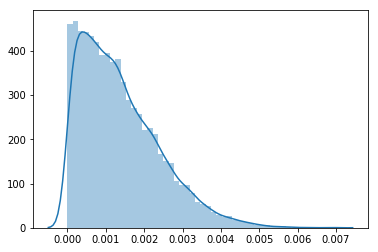

95% Confidence Interval: (-0.00064836046439810998, 0.003386087008331963)
Mean: 0.0013688632719669265, Standard Error: 0.001029214695921272


In [15]:
sns.distplot(bs_mean_er)
plt.show()

mean_stats = sp.describe(bs_mean_er)
mean, sem = mean_stats[2], np.sqrt(mean_stats[3])
conf_int = sp.norm.interval(0.95, loc=mean, scale=sem)
print('95% Confidence Interval: {}'.format(conf_int))
print('Mean: {}, Standard Error: {}'.format(mean, sem))

**Conclusion:** We do not reject the null hypothesis H0. Thus, there is no difference in excess readmission ratio between small and large hospitals. 

This is confirmed with following statistics:
1. p-value: 0.0
2. Stadard error of mean: 0.001025
3. 95% Confidence interval: (-0.000645, 0.00337)